> # Flight Fare Predictions 
> ----

> By - Gautam Sharma

## Import all required dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
47h 40m      1
29h 10m      1
28h 30m      1
30h 15m      1
5m           1
Name: Duration, Length: 368, dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

In [11]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [12]:
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [13]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


> Here we extract day and month from the Date 0f journey so drop it

In [14]:
df.drop(['Date_of_Journey'],axis = 1, inplace = True)

> Departure time is when a plane leaves the Gate.

> from Date_of Journey we extract day and months , now similarly extract the Hours and minutes

In [15]:
# Extracting the hours
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [16]:
# Extracting the minutes
df['Dep_ min'] = pd.to_datetime(df['Dep_Time']).dt.minute

> After extractin the hour and minutes we drop the Dep_time column

In [17]:
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [18]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_ min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


> Arrival time means when plane enter in gate.

> Similary we extract the value from Arrival_time

In [19]:
# Extracting the Arrival_hours
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour

In [20]:
# Extracting the Arrival_min
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [21]:
# Drop the Arrival time column
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [23]:
df.shape

(10682, 14)

> Time taken by plane to reach destination is called Duration
> It is the differnce betwwen Departure Time and Arrival time


> Assigning and converting Duration column into list

In [24]:
duration = list(df["Duration"])

for i in range(len(duration)):
    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adds 0 minute
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adds 0 hour
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extract hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    # Extracts only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

> Adding duration_hours and duration_mins list to df dataframe

In [25]:
df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins

In [26]:
df.drop(['Duration'],axis = 1, inplace=True)

In [27]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [28]:
df.shape

(10682, 15)

In [29]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


> # Plot a graph Airline vs Price

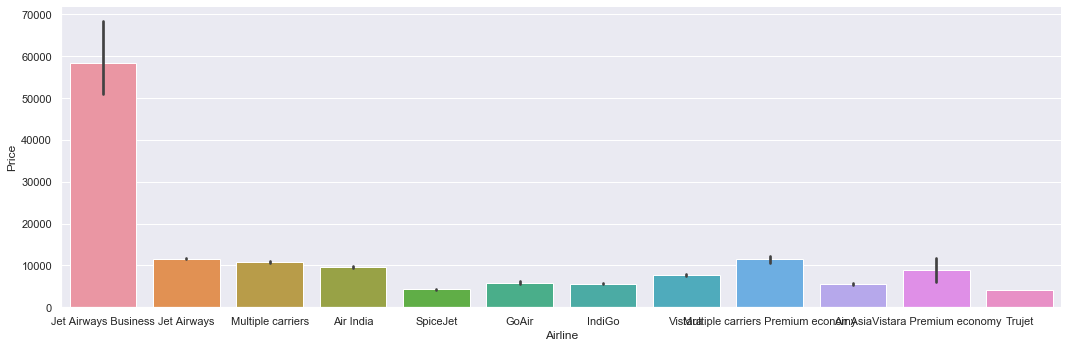

In [30]:
sns.catplot(x = 'Airline', y='Price', data=df.sort_values('Price',ascending=False),kind = 'bar', aspect = 3)
plt.show()

> From graph we can see that Jet Airways Business have the highest Price.

> Apart from the first Airline almost all are having similar median

In [31]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline =df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first= True)

In [32]:
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [33]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

 > # Plot a graph Source Vs Price

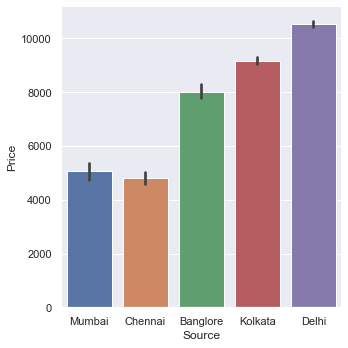

In [35]:
sns.catplot(x = 'Source', y= 'Price', data=df.sort_values('Price',ascending=True),kind = 'bar')
plt.show()

In [36]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

In [37]:
Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [38]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [39]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [40]:
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [75]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [41]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [42]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [44]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [45]:
df.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


> Concatenate dataframe -- > train_data + Airline + Source + Destination

In [46]:
df = pd.concat([df,Airline,Source, Destination],axis = 1)

In [47]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [48]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [49]:
df.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [50]:
df.shape

(10682, 30)

> # Test Data
> ----

df_ = Data_test

In [51]:
df_ = pd.read_excel('Test_set.xlsx')

In [52]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(df_.info())

print()
print()

print("Null values :")
print("-"*75)
df_.dropna(inplace = True)
print(df_.isnull().sum())

# EXploratory Data Analysis

# Date_of_Journey
df_["Journey_day"] = pd.to_datetime(df_.Date_of_Journey, format="%d/%m/%Y").dt.day
df_["Journey_month"] = pd.to_datetime(df_["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df_["Dep_hour"] = pd.to_datetime(df_["Dep_Time"]).dt.hour
df_["Dep_min"] = pd.to_datetime(df_["Dep_Time"]).dt.minute
df_.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_["Arrival_hour"] = pd.to_datetime(df_.Arrival_Time).dt.hour
df_["Arrival_min"] = pd.to_datetime(df_.Arrival_Time).dt.minute
df_.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(df_["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
df_["Duration_hours"] = duration_hours
df_["Duration_mins"] = duration_mins
df_.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(df_["Airline"].value_counts())
Airline = pd.get_dummies(df_["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(df_["Source"].value_counts())
Source = pd.get_dummies(df_["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(df_["Destination"].value_counts())
Destination = pd.get_dummies(df_["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
df_.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
df_ = pd.concat([df_, Airline, Source, Destination], axis = 1)

df_.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", df_.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [53]:
df_.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0


In [71]:
df.shape

(10682, 30)

In [60]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_ min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

# Feature Selection

In [54]:
print('Train_data shape is: ',df.shape)
print('Test_data shape is: ',df_.shape)

Train_data shape is:  (10682, 30)
Test_data shape is:  (2671, 28)


In [55]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_ min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [122]:
x = df.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_ min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_ min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
x.shape

(10682, 29)

In [124]:
y = df.iloc[:,1]

In [125]:
y.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

> Finds correlation between Independent and dependent attributes

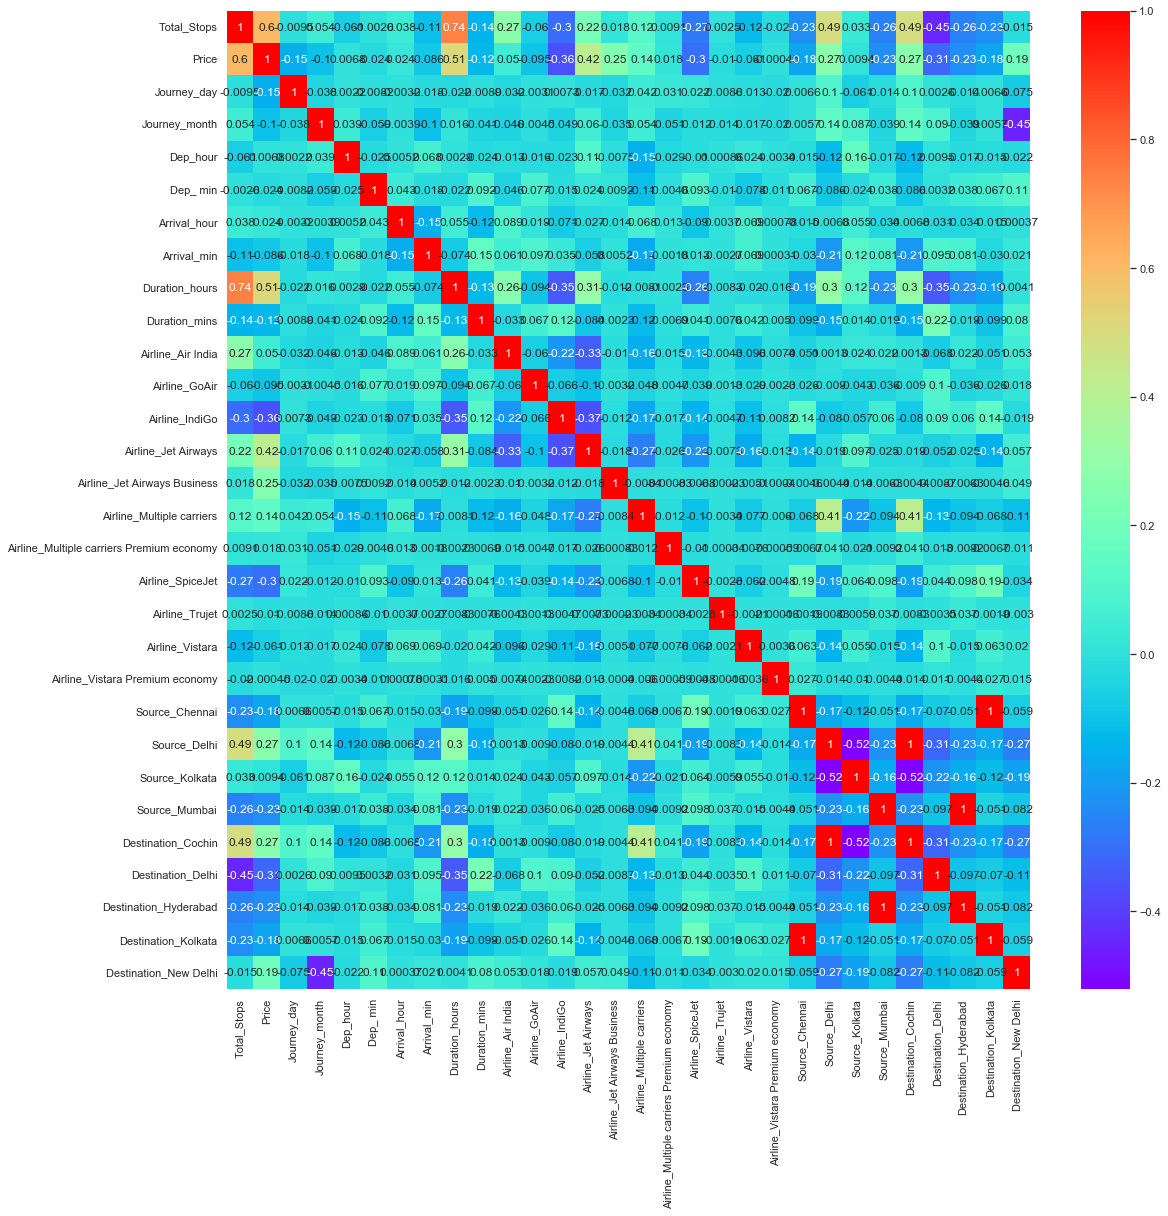

In [126]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),annot = True, cmap= 'rainbow')
plt.show()

> mportant feature using ExtraTreesRegressor
---

In [127]:
from sklearn.ensemble import ExtraTreesRegressor

In [128]:
selection = ExtraTreesRegressor()

In [129]:
selection.fit(x,y)

ExtraTreesRegressor()

In [130]:
print(selection.feature_importances_)

[2.35262538e-01 1.43917505e-01 5.31884432e-02 2.40354492e-02
 2.14165564e-02 2.74879161e-02 1.88979842e-02 1.14790349e-01
 1.80826620e-02 1.08559784e-02 1.78869941e-03 1.63586651e-02
 1.39715704e-01 6.74836995e-02 1.96602396e-02 8.61897177e-04
 2.90518505e-03 1.29818015e-04 5.16483001e-03 9.10379526e-05
 5.01245614e-04 1.16770472e-02 3.09440737e-03 7.35493825e-03
 6.72263813e-03 1.59423758e-02 7.19415542e-03 5.00790099e-04
 2.49172453e-02]


> plot graph of feature importances for better visualization
___

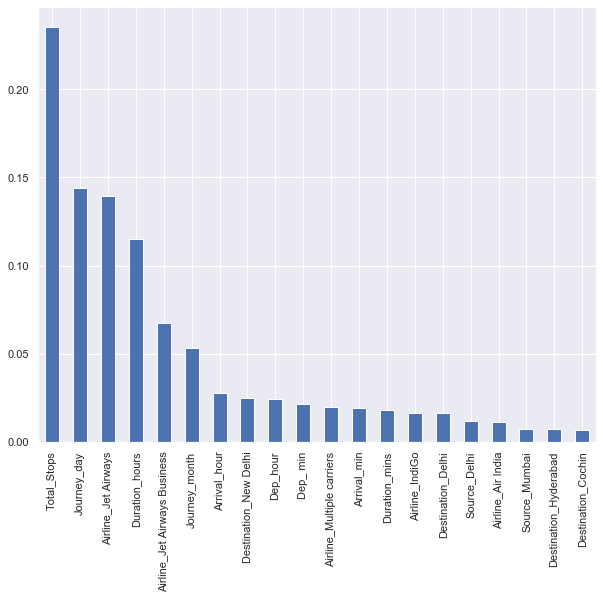

In [131]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()

> # Fitting Model using Random Forest
________________________


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
rfr = RandomForestRegressor()

In [136]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [137]:
y_pred = rfr.predict(x_test)

In [138]:
rfr.score(x_train, y_train)

0.9540827412075997

In [139]:
rfr.score(x_test, y_test)

0.7969569433471085

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


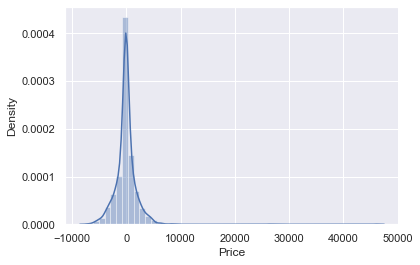

In [140]:
sns.distplot(y_test- y_pred)
plt.show()

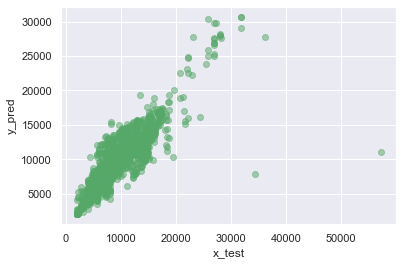

In [141]:
plt.scatter(y_test, y_pred, alpha = 0.5, color = 'g')
plt.xlabel('x_test')
plt.ylabel('y_pred')
plt.show()

In [142]:
from sklearn import metrics

In [143]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 1178.2600562603438


In [144]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 4378025.823779617


In [145]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 2092.3732515446704


In [146]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [147]:
metrics.r2_score(y_test, y_pred)

0.7969569433471085

> # Hyperparameter Tunning
________

In [148]:
from sklearn.model_selection import RandomizedSearchCV

In [149]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [150]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [151]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [152]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [153]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [154]:
prediction = rf_random.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


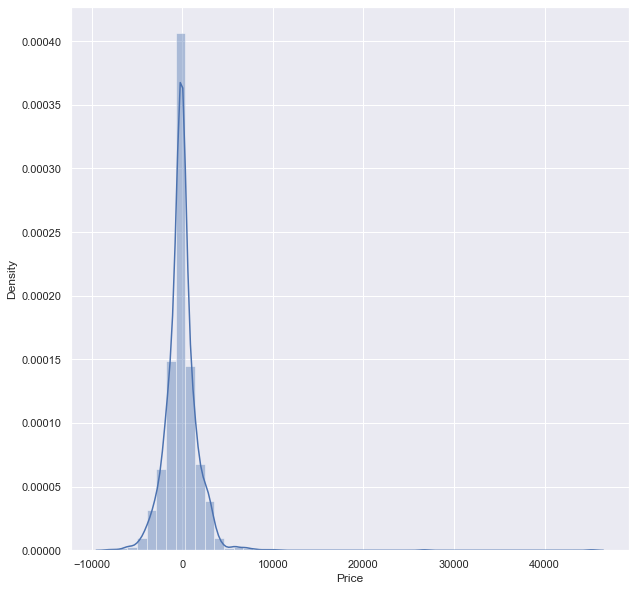

In [155]:
plt.figure(figsize = (10,10))
sns.distplot(y_test-prediction)
plt.show()

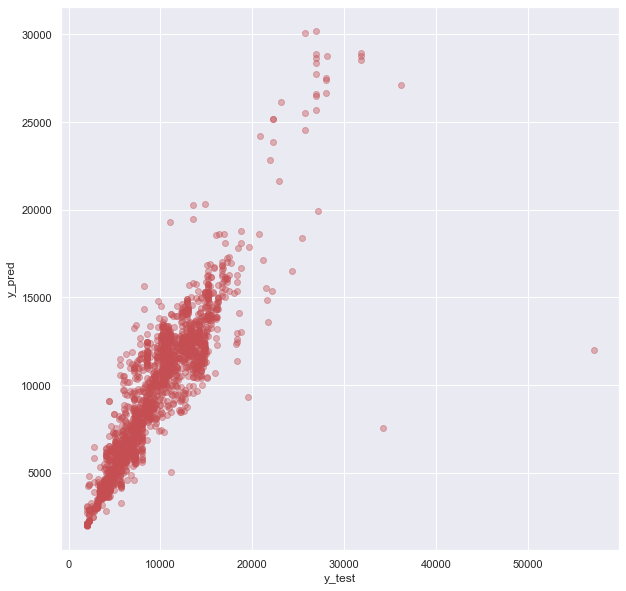

In [156]:
plt.figure(figsize = (10,10))
plt.scatter(y_test, prediction, alpha=0.4, color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [157]:
print('MAE', metrics.mean_absolute_error(y_test, prediction))

MAE 1165.886216829479


In [158]:
print('MSE',metrics.mean_squared_error(y_test, prediction))

MSE 4055434.548686757


In [159]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE:  2013.8109515758317


> # Pickle the model
____

In [160]:
import pickle

In [161]:
# open a file, where you ant to store the data
file = open('flight.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)